In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
# generate 2d data
np.random.seed(42)


x = np.random.rand(100).round(3)
y = np.random.rand(x.shape[0]).round(3)

In [6]:
POINTS = np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
print('data shape')
print(POINTS.shape)
print('first 5 points')
print(POINTS[:5, :])

data shape
(100, 2)
first 5 points
[[0.375 0.031]
 [0.951 0.636]
 [0.732 0.314]
 [0.599 0.509]
 [0.156 0.908]]


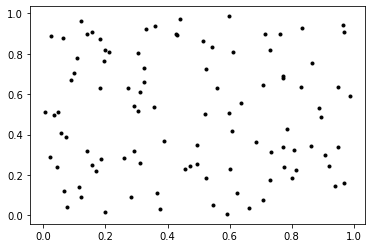

In [15]:
plt.plot(x, y, linestyle="None", marker='o', color='k', markersize=3)

In [18]:
def calc_distance(point_A: tuple, point_B: tuple) -> float:
    """
    >>> cal_distance((0, 0), (0, 1))
    >>> 1

    >>> cal_distance((0, 0), (1, 1))
    >>> sqrt(2)
    """
    dist = ((point_B[0] - point_A[0])**2 + (point_B[1] - point_A[1])**2) ** .5

    return dist

assert calc_distance((0, 0), (1, 1)) == 2 ** .5
assert calc_distance((2, 2), (3, 4)) == 5 ** .5

In [21]:
# initialize random centrois
NUM_CENTROIDS = 3
centroids = np.random.rand(NUM_CENTROIDS, 2)
centroids 

array([[0.10147154, 0.66350177],
       [0.00506158, 0.16080805],
       [0.54873379, 0.6918952 ]])

In [22]:
# (1) calculate distance between each centroid and each point

x_delta = (centroids[:, 0].reshape(-1, 1) - POINTS[:, 0])
y_delta = (centroids[:, 1].reshape(-1, 1) - POINTS[:, 1])
delta = (x_delta ** 2 + y_delta ** 2) ** .5

In [24]:
print(delta.shape)
print(delta[:, :5])

(3, 100)
[[0.68911269 0.8499735  0.72091443 0.5209658  0.25050497]
 [0.39205173 1.05858721 0.74290459 0.68847692 0.76228486]
 [0.68334903 0.40613099 0.41998962 0.18967695 0.44826456]]


In [25]:
# verify
print(POINTS[0])

print(calc_distance(POINTS[0], centroids[0]))
print(calc_distance(POINTS[0], centroids[1]))
print(calc_distance(POINTS[0], centroids[2]))

[0.375 0.031]
0.6891126938222145
0.39205173377907193
0.6833490264139822


In [30]:
# (2) find nearest points
nearest_centroid = np.argmin(delta, axis=0)
nearest_centroid[:5]

array([1, 2, 2, 2, 0])

In [37]:
# (3) re-assign groups
groups = {}
for group_num, _ in enumerate(centroids):
    groups[group_num] = POINTS[np.where(nearest_centroid==group_num)]

In [41]:
# (4) find new group centroids
new_centroids = []

for k, v in groups.items():
    print(k, end=': ')
    print(len(v))

    group_centroid_x = v[:, 0].mean()
    group_centroid_y = v[:, 1].mean()

    new_centroids.append(np.array([group_centroid_x, group_centroid_y]))

new_centroids = np.concatenate(new_centroids).reshape(3, -1)

0: 22
1: 22
2: 56


In [55]:
# (5) repeat (1) for 50 loops
for _ in range(50):

    # (1) calculate distance between each centroid and each point
    x_delta = (new_centroids[:, 0].reshape(-1, 1) - POINTS[:, 0])
    y_delta = (new_centroids[:, 1].reshape(-1, 1) - POINTS[:, 1])
    delta = (x_delta ** 2 + y_delta ** 2) ** .5

    # (2) find nearest points
    nearest_centroid = np.argmin(delta, axis=0)

    # (3) re-assign groups
    groups = {}
    for group_num, _ in enumerate(centroids):
        groups[group_num] = POINTS[np.where(nearest_centroid==group_num)]

    # (4) find new group centroids
    new_centroids = []

    for k, v in groups.items():
        print(k, end=': ')
        print(len(v), end='\t')

        group_centroid_x = v[:, 0].mean()
        group_centroid_y = v[:, 1].mean()

        new_centroids.append((group_centroid_x, group_centroid_y))

    new_centroids = np.concatenate(new_centroids).reshape(3, -1)
    print()


0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	0: 33	1: 31	2: 36	

In [ ]:
# (6) stop when groups dont change for 3 iters or exceeded n iters
# TODO: implement early stopping

In [62]:
# final centroids
new_centroids

array([[0.25806061, 0.76233333],
       [0.31854839, 0.19474194],
       [0.79522222, 0.51641667]])

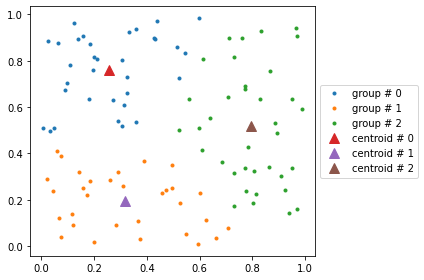

In [67]:
fig, ax = plt.subplots()
for grp_num, points in groups.items():
    ax.plot(points[:, 0], points[:, 1], linestyle="None", marker='o', markersize=3, label=f'group # {grp_num}')

for grp_num, centroid in enumerate(new_centroids):
    ax.plot(centroid[0], centroid[1], linestyle="None", marker='^', markersize=10, label=f'centroid # {grp_num}')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()